In [1]:
import os
import time
import pandas as pd
# Suppressing some warnings in pandas
pd.options.mode.chained_assignment = None
import numpy as np
import glob
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, date, time, timedelta
from ta import add_all_ta_features

from feature_creation import *

# Dash modules
import dash
import dash_table
import dash_core_components as dcc
import dash_html_components as html
from jupyter_dash import JupyterDash
import plotly.express as px
import plotly.graph_objects as go

# Set up jupyter proxy
# JupyterDash.infer_jupyter_proxy_config()

%matplotlib inline

In [3]:
# # Creating stock_df from feature file
stock_df = daily_features()
recommendations_df = pd.read_csv('assets/ticker_recommendations.csv')
stock_df.head()

,Adj Close,Close,Close_adj,Dividends,High,High_adj,Low,Low_adj,Open,Open_adj,Stock Splits,Volume,sector,ticker,SMA_5,SMA_15,SMA_ratio,SD,upperband,lowerband
Date,,,,,,,,,,,,,,,,,,,,
1990-02-16,0.056967,0.056967,0.077257,0.0,0.058887,0.079861,0.054407,0.073785,0.0,0.0,0.0,940636800.0,Technology,CSCO,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-20,0.058887,0.058887,0.079861,0.0,0.058887,0.079861,0.055047,0.074653,0.0,0.0,0.0,151862400.0,Technology,CSCO,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-21,0.057607,0.057607,0.078125,0.0,0.058247,0.078993,0.055687,0.075521,0.0,0.0,0.0,70531200.0,Technology,CSCO,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-22,0.058247,0.058247,0.078993,0.0,0.060167,0.081597,0.058247,0.078993,0.0,0.0,0.0,45216000.0,Technology,CSCO,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-23,0.057927,0.057927,0.078559,0.0,0.058887,0.079861,0.057607,0.078125,0.0,0.0,0.0,44697600.0,Technology,CSCO,0.057927,NaN,NaN,NaN,NaN,NaN


In [4]:
stock_df.head(3)

,Adj Close,Close,Close_adj,Dividends,High,High_adj,Low,Low_adj,Open,Open_adj,Stock Splits,Volume,sector,ticker,SMA_5,SMA_15,SMA_ratio,SD,upperband,lowerband
Date,,,,,,,,,,,,,,,,,,,,
1990-02-16,0.056967,0.056967,0.077257,0.0,0.058887,0.079861,0.054407,0.073785,0.0,0.0,0.0,940636800.0,Technology,CSCO,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-20,0.058887,0.058887,0.079861,0.0,0.058887,0.079861,0.055047,0.074653,0.0,0.0,0.0,151862400.0,Technology,CSCO,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-21,0.057607,0.057607,0.078125,0.0,0.058247,0.078993,0.055687,0.075521,0.0,0.0,0.0,70531200.0,Technology,CSCO,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Create list of tickers for creating technical features and later usage
tickers = list(stock_df.ticker.unique())

In [42]:
# # Running technical analysis feature creation for all tickers individually

# # count = 0

# for ticker in tickers:
    
#     temp_df = stock_df[stock_df['ticker']==ticker]
    
#     temp_df = add_all_ta_features(
#     temp_df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)
    
#     if count == 0:
#         feature_df = temp_df
#         count += 1
        
#     else:
#         feature_df = pd.concat([feature_df,temp_df])
#         count += 1
#     print(f'Finished {ticker}. Done with {count} of 504 tickers')
    
# # save feature df to csv for future usage. Feature creation takes hours on entire dataset
# feature_df.to_csv('assets/models/tyler_rf_daily_update/ta_feature_df.csv')

In [10]:
# Or just load if no need to re-create features
feature_df = pd.read_csv('assets/models/tyler_rf_daily_update/ta_feature_df.csv',index_col=0)

In [42]:
feature_df.index = pd.to_datetime(feature_df.index)

In [43]:
feature_df.head()

,Adj Close,Close,Close_adj,Dividends,High,High_adj,Low,Low_adj,Open,Open_adj,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
1990-02-16,0.056967,0.056967,0.077257,0.0,0.058887,0.079861,0.054407,0.073785,0.0,0.0,...,-42.857143,0.0,0.056967,0.0,0.000000,0.000000,0.000000,-99.670356,0.000000,0.000000
1990-02-20,0.058887,0.058887,0.079861,0.0,0.058887,0.079861,0.055047,0.074653,0.0,0.0,...,-0.000804,0.0,0.057802,0.0,-7.132343,-1.426469,-5.705874,3.370505,3.314949,3.370505
1990-02-21,0.057607,0.057607,0.078125,0.0,0.058247,0.078993,0.055687,0.075521,0.0,0.0,...,-28.571863,0.0,0.057718,0.0,-14.352665,-4.011708,-10.340957,-2.173750,-2.197724,1.123489
1990-02-22,0.058247,0.058247,0.078993,0.0,0.060167,0.081597,0.058247,0.078993,0.0,0.0,...,-33.333463,0.0,0.057944,0.0,-21.164525,-7.442271,-13.722254,1.111033,1.104906,2.247004
1990-02-23,0.057927,0.057927,0.078559,0.0,0.058887,0.079861,0.057607,0.078125,0.0,0.0,...,-38.889100,0.0,0.057937,0.0,-27.325018,-11.418821,-15.906197,-0.549422,-0.550937,1.685236


In [44]:
# Simple visualization of a ticker price over time
fig = go.Figure()

ticker = 'AAPL'
df = feature_df[(feature_df['ticker']==ticker)&(feature_df.index>='2018-01-01')]

fig.add_trace(go.Scatter(x=df.index,
                         y=df['Close'],
                        line={"color": "#228B22"},
                        mode="lines",
                        name='Closing Price'))

fig.add_trace(go.Scatter(x=df.index,
                         y=df['trend_sma_fast'],
                        line={"color": "red","dash":"dash","width":1},
                        mode="lines",
                        name='Closing Price'))

fig.add_trace(go.Scatter(x=df.index,
                         y=df['trend_sma_slow'],
                        line={"color": "black","dash":"dash","width":1},
                        mode="lines",
                        name='Closing Price'))


fig.update_layout(title_text=f'{ticker} Closing Price',title_x=0.5,
                         template="ggplot2",font=dict(size=10,color='black'),xaxis_showgrid=False,
                         paper_bgcolor='rgba(0,0,0,0)',
                         yaxis_title="Closing Price",margin={"r": 20, "t": 35, "l": 20, "b": 10},
                         showlegend=False)

fig.show()

In [45]:
# re_df = df.resample('M').mean()['Close'].reset_index()
# re_df

In [46]:
# def cagr(start_value, end_value, num_periods):
#     return (end_value / start_value) ** (1 / (num_periods - 1)) - 1

# for i in range(1,len(re_df)):
#     if i == 1:
#         re_df.loc[i,'CAGR'] = re_df.iloc[i]['Close'] / re_df.iloc[0]['Close'] - 1
#     else:
#         re_df.loc[i,'CAGR'] = cagr(re_df.iloc[0]['Close'], re_df.iloc[i]['Close'],i)

In [47]:
def calculate_cagr(df,freq):

    """
    df: stock_df with tickers and prices
    freq: CAGR frequency. Acceptable values are for pandas df.resample. Most common are "M" and "Y"
    """
    
    def cagr(start_value, end_value, num_periods):
        return (end_value / start_value) ** (1 / (num_periods - 1)) - 1
    
    for ticker in df.ticker.unique():
        temp_df = df[df['ticker']==ticker]
        temp_df = temp_df.resample(freq).mean()['Close'].reset_index()
            
        for i in range(1,len(temp_df)):
            if i == 1:
                temp_df.loc[i,'CAGR'] = temp_df.iloc[i]['Close'] / temp_df.iloc[0]['Close'] - 1
            else:
                temp_df.loc[i,'CAGR'] = cagr(temp_df.iloc[0]['Close'], temp_df.iloc[i]['Close'],i)

    return temp_df

In [48]:
# calculate_cagr(stock_df,'M')

In [49]:
def roi_chart(start_date,end_date,figure_type='ticker',tickers=None):
    
    """
    start_date: datetime (YYYY-MM-DD) for first date in period
    end_date: datetime (YYYY-MM-DD) for last date in period
    figure_type: 'ticker' or 'sector'. ticker requires a list of tickers to be provided
    tickers: list of ticker symbols used for visualizing ROI for each ticker
    """

    fig = go.Figure()
    
    if figure_type == 'ticker':

        for ticker in tickers:

            returns_df = feature_df[(feature_df['ticker']==ticker)&(feature_df.index>=start_date)&(feature_df.index<=end_date)]

            starting_price = returns_df['Close_adj'].min()
            time = []
            ticker_rtrn = []

            for i in range(1,len(returns_df)):

                roi = returns_df.iloc[i]['Close_adj'] / starting_price - 1
                curr_time = returns_df.iloc[i].name

                ticker_rtrn.append(roi)
                time.append(curr_time)

            fig.add_trace(go.Scatter(x=time,
                                 y=ticker_rtrn,
                                mode="lines",
                                name=ticker,
                                showlegend=True))

        fig.show()

    elif figure_type == 'sector':
        
        sector_df = pd.DataFrame(columns=['date','roi','sector','ticker'])
        
        tick_list = list(zip(feature_df.ticker, feature_df.sector))
        newlist = []
        
        for i in tick_list:
            if i not in newlist:
                newlist.append(i)
        
        for ticker, sector in newlist:
            returns_df = feature_df[(feature_df['ticker']==ticker)&(feature_df.index>=start_date)&(feature_df.index<=end_date)]
            
            starting_price = returns_df['Close_adj'].min()
            time = []
            ticker_rtrn = []
            
            for i in range(1,len(returns_df)):

                roi = returns_df.iloc[i]['Close_adj'] / starting_price - 1
                curr_time = returns_df.iloc[i].name

                ticker_rtrn.append(roi)
                time.append(curr_time)
                
                            
            temp_df = pd.DataFrame(data=list(zip(time,ticker_rtrn)), index=time,columns=['date','roi'])
            temp_df['sector'] = sector
            temp_df['ticker'] = ticker
            sector_df = sector_df.append(temp_df)
            
        sector_df_grouped = sector_df.groupby(['date','sector']).mean('roi').reset_index()
            
        sectors = sector_df_grouped.sector.unique()
        
        for sector in sectors:
            temp_df = sector_df_grouped[sector_df_grouped['sector']==sector]
            
            fig.add_trace(go.Scatter(x=temp_df['date'],
                                 y=temp_df['roi'],
                                mode="lines",
                                name=sector,
                                showlegend=True))
            
        fig.show()
            
        return sector_df


In [47]:
sector_df = roi_chart('2015-01-01','2015-12-31',figure_type='sector')

In [ ]:
# Display sample records from sector_df
# sector_df.head(3)

### Using Facebook Prophet to create simple time series forecasting models

In [50]:
# Creating sample df for AAPL only
sample_df = feature_df[(feature_df['ticker']=='AAPL')&(feature_df.index>='2018-01-01')&(feature_df.index<='2020-12-31')]

In [51]:
# Creating target variables to look at performance in forecasting at different time horizons
sample_df['target_7'] = sample_df['Close_adj'].shift(-7)
sample_df['target_30'] = sample_df['Close_adj'].shift(-30)
sample_df['target_60'] = sample_df['Close_adj'].shift(-60)
sample_df['target_120'] = sample_df['Close_adj'].shift(-120)

In [52]:
sample_df.head(3)

,Adj Close,Close,Close_adj,Dividends,High,High_adj,Low,Low_adj,Open,Open_adj,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,target_7,target_30,target_60,target_120
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,41.310070,41.310070,43.064999,0.0,41.319665,43.075001,40.590633,42.314999,40.806466,42.540001,...,-4.750651,-3.764381,-0.986270,1.790453,1.774613,40902.244949,43.820000,41.842499,41.945000,45.542500
2018-01-03,41.302879,41.302879,43.057499,0.0,41.859246,43.637501,41.238133,42.990002,41.374824,43.132500,...,-2.850176,-3.581540,0.731364,-0.017407,-0.017408,40895.107826,44.272499,43.247501,41.669998,46.107498
2018-01-04,41.494736,41.494736,43.257500,0.0,41.600254,43.367500,41.266915,43.020000,41.377226,43.134998,...,-3.569624,-3.579157,0.009533,0.464511,0.463435,41085.534578,44.047501,43.107498,42.097500,46.040001


In [53]:
# Test Train split
split_perc = .8
train_df = sample_df.iloc[:int(len(sample_df)*split_perc)]
test_df = sample_df.iloc[int(len(sample_df)*split_perc):]

In [54]:
# Ensuring the test/train split worked correctly
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_df.index,
                         y=train_df['Close_adj'],
                        line={"color": "#228B22"},
                        mode="lines",
                        name='Train'))

fig.add_trace(go.Scatter(x=test_df.index,
                         y=test_df['Close_adj'],
                        line={"color": "red"},
                        mode="lines",
                        name='Test'))

In [55]:
# Testing initial implementation with Facebook's Prophet library
from prophet import Prophet

# Prophet requires the data to be in this format for fitting
train_df_prop = train_df.reset_index()[['Date','Close_adj']]
train_df_prop.columns = ['ds', 'y']

# Fit the model and turn on daily seasonality
m = Prophet(daily_seasonality=True)
m.fit(train_df_prop)

Initial log joint probability = -7.16406


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1453.08      0.053636        291.92           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164       1483.73   0.000261798       244.369   1.835e-06       0.001      240  LS failed, Hessian reset 
     199       1489.13     0.0109115       415.468       2.574      0.2574      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1501.08    0.00167293       133.435      0.9492      0.9492      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     337       1505.93   0.000738905       326.388   4.421e-06       0.001      488  LS failed, Hessian reset 
     399       1508.22    0.00187625       157.347           1           1      560   
    Iter      log prob        ||dx||      ||grad||       alpha

In [56]:
# Create future periods for prediction purposes
future = m.make_future_dataframe(periods=365)

# Create predictions
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,41.307970,37.123920,44.134755,41.307970,41.307970,-0.772297,-0.772297,-0.772297,-5.628321,...,-0.270571,-0.270571,-0.270571,5.126595,5.126595,5.126595,0.0,0.0,0.0,40.535673
1,2018-01-03,41.398502,37.319397,44.518720,41.398502,41.398502,-0.460437,-0.460437,-0.460437,-5.628321,...,-0.125324,-0.125324,-0.125324,5.293208,5.293208,5.293208,0.0,0.0,0.0,40.938065
2,2018-01-04,41.489034,37.405553,44.526520,41.489034,41.489034,-0.355046,-0.355046,-0.355046,-5.628321,...,-0.186848,-0.186848,-0.186848,5.460124,5.460124,5.460124,0.0,0.0,0.0,41.133988
3,2018-01-05,41.579566,37.400939,44.652754,41.579566,41.579566,-0.329710,-0.329710,-0.329710,-5.628321,...,-0.327860,-0.327860,-0.327860,5.626471,5.626471,5.626471,0.0,0.0,0.0,41.249855
4,2018-01-08,41.851162,38.192467,45.639420,41.851162,41.851162,-0.013545,-0.013545,-0.013545,-5.628321,...,-0.496477,-0.496477,-0.496477,6.111252,6.111252,6.111252,0.0,0.0,0.0,41.837617


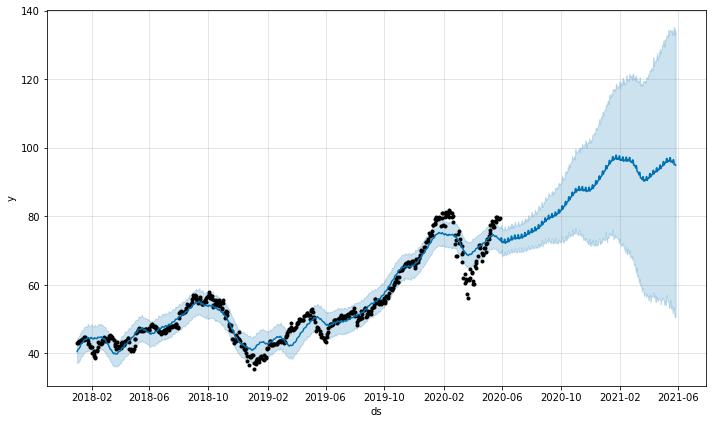

In [57]:
# Prophet allows you to also plot the forecast.
# Generally, forecast seems to work well, but confidence bands are wide the further in the future you go
fig1 = m.plot(forecast)

In [58]:
forecast = forecast.set_index('ds')

forecast_compare = forecast[forecast.index>=test_df.index.min()]

In [59]:
fig.add_trace(go.Scatter(x=forecast_compare.index,
                         y=forecast_compare['yhat'],
                        line={"color": "black"},
                        mode="lines",
                        name='Prophet'))

### Some initial thoughts:
1. Prophet did a fairly good job of creating a conservative forecast, but not that accurate (how do we use this for decision boundaries?) - good at forecasting trend, not price
2. Should look at multiple scenarios of stocks, such as different trends (what how does prediction look for stocks that have been steady then went through a sharp decline?)
3. Should create market personas(?) to help with modeling different behavior (similar to creating sector-specific models)
4. How do I wrap this up into one model for a bunch of tickers?
5. Need to figure out how to incorprate the portolio class and buy/sell strategy

In [60]:
train_df.head(3)

,Adj Close,Close,Close_adj,Dividends,High,High_adj,Low,Low_adj,Open,Open_adj,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,target_7,target_30,target_60,target_120
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,41.310070,41.310070,43.064999,0.0,41.319665,43.075001,40.590633,42.314999,40.806466,42.540001,...,-4.750651,-3.764381,-0.986270,1.790453,1.774613,40902.244949,43.820000,41.842499,41.945000,45.542500
2018-01-03,41.302879,41.302879,43.057499,0.0,41.859246,43.637501,41.238133,42.990002,41.374824,43.132500,...,-2.850176,-3.581540,0.731364,-0.017407,-0.017408,40895.107826,44.272499,43.247501,41.669998,46.107498
2018-01-04,41.494736,41.494736,43.257500,0.0,41.600254,43.367500,41.266915,43.020000,41.377226,43.134998,...,-3.569624,-3.579157,0.009533,0.464511,0.463435,41085.534578,44.047501,43.107498,42.097500,46.040001


In [61]:
features = list(train_df.columns)[15:len(train_df.columns)-4]

In [62]:
# Using a Random Forest Regressor to test time horizon predictions
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=5, random_state=0)

X = train_df[features]
y = train_df['target_7']

regr.fit(X, y)

RandomForestRegressor(max_depth=5, random_state=0)

In [63]:
# Plotting feature importance. Vast majority of features seem to be of no use to the model, so will drop
fig = go.Figure()

feats = [x for _, x in sorted(zip(regr.feature_importances_,features),reverse=True)]
importance = sorted(regr.feature_importances_,reverse=True)

fig.add_trace(go.Bar(x=feats, y=importance,name="Feature Importance"))

fig.add_trace(go.Scatter(x=feats,
                         y=np.cumsum(sorted(regr.feature_importances_,reverse=True)),
                         line={"color":"black"},
                         mode="lines",
                         name="Cumulative Importance"
                        ))
                         

fig.show()

In [64]:
# Getting only features that are important up to a threshold
thresh = .96
thresh_len = len([x for x in np.cumsum(sorted(regr.feature_importances_,reverse=True)) if x <= thresh])
[x for x in np.cumsum(sorted(regr.feature_importances_,reverse=True)) if x <= thresh]

[0.15628465547392478,
 0.24228234717072014,
 0.32039484180548344,
 0.38866208827593385,
 0.4506052670468377,
 0.5055831210746419,
 0.5602295647288507,
 0.6143937926918397,
 0.6685112223888728,
 0.7078305760461447,
 0.7468338461672918,
 0.7856395471821814,
 0.8175426731361459,
 0.8491085682666626,
 0.8804056224797144,
 0.9039043814911785,
 0.9200262138942854,
 0.9357654740519502,
 0.9475023790761609,
 0.9563901586841211]

In [65]:
# Including all features under importance threshold
updated_feats = feats[:thresh_len+1]

In [66]:
# Re-training model with smaller subset of features
regr = RandomForestRegressor(max_depth=5, random_state=0)

X = train_df[updated_feats]
y = train_df['target_7']

regr.fit(X, y)

RandomForestRegressor(max_depth=5, random_state=0)

In [67]:
# Feature importances still seem appropriate given all are somewhat close to 1%
# R^2 is very high. This model is most likely highly overfit
regr.feature_importances_, regr.score(X,y)

(array([0.16948429, 0.06490748, 0.05832252, 0.07059909, 0.05465841,
        0.03135002, 0.07292808, 0.02404239, 0.03959279, 0.07317919,
        0.04747828, 0.02385721, 0.04247838, 0.07079181, 0.01585867,
        0.03156786, 0.03222813, 0.01629333, 0.02824216, 0.01741371,
        0.01472619]),
 0.9889727141657079)

In [68]:
train_predictions = regr.predict(train_df[updated_feats])

In [69]:
test_predictions = regr.predict(test_df[updated_feats])

In [70]:
# Looking at prediction performance. So far, our model does a horrible job at predicting the future
# Will look into some thresholding on price projections/ROI to making buying/selling decisions
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_df.index,
                         y=train_df['Close_adj'],
                        line={"color": "#228B22"},
                        mode="lines",
                        name='Train'))

fig.add_trace(go.Scatter(x=train_df.index+datetime.timedelta(days=7),
                         y=train_predictions,
                        line={"color": "gray","dash":"dash"},
                        mode="lines",
                        name='Train Predictions'))

fig.add_trace(go.Scatter(x=test_df.index,
                         y=test_df['Close_adj'],
                        line={"color": "#228B22","dash":"dash"},
                        mode="lines",
                        name='Test Actuals'))

fig.add_trace(go.Scatter(x=test_df.index+datetime.timedelta(days=7),
                         y=test_predictions,
                        line={"color": "red"},
                        mode="lines",
                        name='Test Predictions (7 Day)'))

In [71]:
# Training a model on 30_Day
# 'target_7', 'target_30', 'target_60','target_120'
regr = RandomForestRegressor(max_depth=5, random_state=0)

X = train_df[features]
y = train_df['target_30']

regr.fit(X, y)

# Getting only features that are important up to a threshold
thresh = .9
thresh_len = len([x for x in np.cumsum(sorted(regr.feature_importances_,reverse=True)) if x <= thresh])
[x for x in np.cumsum(sorted(regr.feature_importances_,reverse=True)) if x <= thresh]

# Including all features under importance threshold
updated_feats = feats[:thresh_len+1]

# Re-training model with smaller subset of features
regr = RandomForestRegressor(max_depth=5, random_state=0)

X = train_df[updated_feats]
y = train_df['target_30']

regr.fit(X, y)

print(regr.feature_importances_, regr.score(X,y))

test_predictions = regr.predict(test_df[updated_feats])

fig.add_trace(go.Scatter(x=test_df.index+datetime.timedelta(days=30),
                         y=test_predictions,
                        line={"color": "red","dash":"dash"},
                        mode="lines",
                        name='Test Predictions (30 Day)'))

[0.11253175 0.03575676 0.17364989 0.04378428 0.53848255 0.01952182
 0.05772149 0.01855146] 0.9560520891182812


In [72]:
# Training a model on 60_Day
# 'target_7', 'target_30', 'target_60','target_120'
regr = RandomForestRegressor(max_depth=5, random_state=0)

X = train_df[features]
y = train_df['target_60']

regr.fit(X, y)

# Getting only features that are important up to a threshold
thresh = .9
thresh_len = len([x for x in np.cumsum(sorted(regr.feature_importances_,reverse=True)) if x <= thresh])
[x for x in np.cumsum(sorted(regr.feature_importances_,reverse=True)) if x <= thresh]

# Including all features under importance threshold
updated_feats = feats[:thresh_len+1]

# Re-training model with smaller subset of features
regr = RandomForestRegressor(max_depth=5, random_state=0)

X = train_df[updated_feats]
y = train_df['target_60']

regr.fit(X, y)

print(regr.feature_importances_, regr.score(X,y))

test_predictions = regr.predict(test_df[updated_feats])

fig.add_trace(go.Scatter(x=test_df.index+datetime.timedelta(days=60),
                         y=test_predictions,
                        line={"color": "blue"},
                        mode="lines",
                        name='Test Predictions (60 Day)'))

[0.07424395 0.02406601 0.218362   0.06843267 0.58096207 0.03393329] 0.9105023400471073


In [73]:
# Training a model on 120_Day
# 'target_7', 'target_30', 'target_60','target_120'
regr = RandomForestRegressor(max_depth=5, random_state=0)

X = train_df[features]
y = train_df['target_120']

regr.fit(X, y)

# Getting only features that are important up to a threshold
thresh = .9
thresh_len = len([x for x in np.cumsum(sorted(regr.feature_importances_,reverse=True)) if x <= thresh])
[x for x in np.cumsum(sorted(regr.feature_importances_,reverse=True)) if x <= thresh]

# Including all features under importance threshold
updated_feats = feats[:thresh_len+1]

# Re-training model with smaller subset of features
regr = RandomForestRegressor(max_depth=5, random_state=0)

X = train_df[updated_feats]
y = train_df['target_120']

regr.fit(X, y)

print(regr.feature_importances_, regr.score(X,y))

test_predictions = regr.predict(test_df[updated_feats])

fig.add_trace(go.Scatter(x=test_df.index+datetime.timedelta(days=120),
                         y=test_predictions,
                        line={"color": "blue","dash":"dash"},
                        mode="lines",
                        name='Test Predictions (120 Day)'))

[0.0262129  0.16747062 0.67845231 0.04482377 0.02602166 0.02385742
 0.03316133] 0.939047698174871


In [74]:
# Observations:
# Every model does a fairly good job of predicting the first data point forecasted in the future,
# but performance drops off significantly from there...potentially an implementation issue
# What objective function should I actually be using?
# Should I weight predictions and decisions based on model backtesting performance?

In [75]:
## Testing model re-fitting when new daily observations come in
regr = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=0)

X = train_df[features]
y = train_df['target_7']

regr.fit(X, y)
# regr.get_params()

# Getting only features that are important up to a threshold
thresh = .96
thresh_len = len([x for x in np.cumsum(sorted(regr.feature_importances_,reverse=True)) if x <= thresh])

regr = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=0)

X = train_df[updated_feats]
y = train_df['target_7']

regr.fit(X, y)

test_prediction = regr.predict(test_df[updated_feats].iloc[[0]])[0]
test_date = test_df[updated_feats].iloc[[0]].index.values[0]

In [76]:
train_df_test = train_df[updated_feats]

pd.concat([train_df_test,test_df[updated_feats].iloc[[0]]])

,others_cr,trend_ema_slow,volatility_dch,volatility_kcl,volatility_bbm,volatility_kch,trend_sma_slow
Date,,,,,,,
2018-01-02,40902.244949,41.149927,42.494754,41.030216,41.236215,41.859488,41.262023
2018-01-03,40895.107826,41.161257,42.494754,40.946361,41.265352,41.787623,41.236750
2018-01-04,41085.534578,41.185959,42.494754,40.900717,41.306001,41.746295,41.226973
2018-01-05,41554.441618,41.243826,42.494754,40.900318,41.377825,41.753090,41.244775
2018-01-08,41399.723195,41.285860,42.494754,40.896160,41.438137,41.737422,41.289693
...,...,...,...,...,...,...,...
2020-05-21,77996.020000,74.085556,79.685569,75.704479,74.847955,79.332534,73.443645
2020-05-22,78498.844462,74.463584,79.685569,75.996180,75.303436,79.515965,73.758581
2020-05-26,77966.456790,74.773877,80.517471,76.197988,75.729620,79.614966,74.089939


In [77]:
new_train_df = train_df
test_preds = []
test_dates = []

# Need to remove last 7 observations due to missing price for 7 days in the future
for i in range(len(test_df)-7):

    # Creating next prediction point
    test_point = test_df[updated_feats].iloc[[i]]

    X = new_train_df[updated_feats]
    y = new_train_df['target_7']

    regr = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=0)

    regr.fit(X, y)

    test_prediction = regr.predict(test_point)[0]
    test_date = test_point.index.values[0]

    test_preds.append(test_prediction)
    test_dates.append(test_date)
    
    # Adding next observation to our training data to simulate re-training a model daily
    new_train_df = pd.concat([new_train_df,test_df.iloc[[i]]])
    
# Adding the final predictions for obersavtions without the target variable
for i in range(len(test_df)-7,len(test_df)):
    
    test_point = test_df[updated_feats].iloc[[i]]
    
    test_prediction = regr.predict(test_point)[0]
    test_date = test_point.index.values[0]
    
    test_preds.append(test_prediction)
    test_dates.append(test_date)


In [ ]:
# test_preds

In [80]:
new_test_df = pd.DataFrame(data=test_preds,index=test_dates,columns=['7_Day'])

In [81]:
# Plotting our new re-fitted predictions with test data
# Fit is much more appropriate...why??
fig = go.Figure()

fig.add_trace(go.Scatter(x=test_df.index,
                         y=test_df['Close'],
                        line={"color": "#228B22","dash":"dash"},
                        mode="lines",
                        name='Test Actuals'))

fig.add_trace(go.Scatter(x=new_test_df.index+datetime.timedelta(days=7),
                         y=new_test_df['7_Day'],
                        line={"color": "red"},
                        mode="lines",
                        name='Test Predictions (7 Day)'))

In [82]:
# Could pick tickers with lowest industry P/E ratios, but for now only picking popular stocks
# getting all sectors to get largest tickers by volumes
sectors = list(feature_df.sector.unique())

# Creating function to get largest tickers for a sector
def largest_tickers_by_vol(sector):
    return list(feature_df[feature_df['sector']==sector].groupby('ticker').mean('Volume')['Volume'].nlargest(5).index.values)

tickers = []

for sector in sectors:
    tickers.extend(largest_tickers_by_vol(sector))

tickers[:10]


['AAPL', 'MSFT', 'CSCO', 'INTC', 'ORCL', 'GE', 'CSX', 'AAL', 'DAL', 'UAL']

In [143]:
# Run to initialize process
ticker_perf = {}
ticker_count = 0

tickers[:5]

['AAPL', 'MSFT', 'CSCO', 'INTC', 'ORCL']

In [156]:
# Creating models for each of our top 5 tickers, saving final models and all predictions to files
import pickle

for ticker in tickers:

    # Creating sample df for ticker only
    sample_df = feature_df[(feature_df['ticker']==ticker)&(feature_df.index>='2016-01-01')&(feature_df.index<='2020-12-31')].fillna(method="ffill")

    # Backfilling if forward filling didn't work
    sample_df = feature_df[(stock_df['ticker']==ticker)&(feature_df.index>='2016-01-01')&(feature_df.index<='2020-12-31')].fillna(method="bfill")

    # Creating target variable to predict prices 7 days in future
    sample_df['target_7'] = sample_df['Close_adj'].shift(-7)

    # Test Train split
    split_perc = .8
    train_df = sample_df.iloc[:int(len(sample_df)*split_perc)]
    test_df = sample_df.iloc[int(len(sample_df)*split_perc):]

    # Creating new df to iteratively add a new row for each new day
    new_train_df = train_df

    # Creating lists to track predictions by day (will be used later to compare ROI)
    test_preds = []
    test_dates = []

    # Fitting my model on inital train_df
    X = new_train_df[updated_feats]
    y = new_train_df['target_7']

    regr = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=0)
    regr.fit(X, y)

    test_point = test_df[updated_feats].iloc[[0]]

    test_prediction = regr.predict(test_point)[0]
    # Used to convert datetime to date for saving purposes
    test_date = pd.to_datetime(str(test_point.index.values[0])).strftime('%Y-%m-%d')

    # Removing last 7 observations due to not having target variable
    for i in range(len(test_df)-7):

        # Creating next prediction point
        test_point = test_df[updated_feats].iloc[[i]]

        X = new_train_df[updated_feats]
        y = new_train_df['target_7']

        regr = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=0)
        regr.fit(X, y)

        test_prediction = regr.predict(test_point)[0]
        # Used to convert datetime to date for saving purposes
        test_date = pd.to_datetime(str(test_point.index.values[0])).strftime('%Y-%m-%d')

        test_preds.append(test_prediction)
        test_dates.append(test_date)

        # Adding next observation to our training data to simulate re-training a model daily
        new_train_df = pd.concat([new_train_df,test_df.iloc[[i]]])

    # Adding the final predictions for observations without the target variable
    for i in range(len(test_df)-7,len(test_df)):

        test_point = test_df[updated_feats].iloc[[i]]

        test_prediction = regr.predict(test_point)[0]
        # Used to convert datetime to date for saving purposes
        test_date = pd.to_datetime(str(test_point.index.values[0])).strftime('%Y-%m-%d')

        test_preds.append(test_prediction)
        test_dates.append(test_date)

    ticker_perf[ticker] = list(zip(test_dates,test_preds))

    # Saving final model to pickle file
    pickle.dump(regr, open(f'assets/models/tyler_rf_daily_update/ticker_models/{ticker}_rf_model.pkl','wb'))

    ticker_count+=1
    print(f'Finished {ticker}. Done with {ticker_count} of 55 tickers')

# Saving all predictions to file
with open('assets/models/tyler_rf_daily_update/td_rf_preds.txt', 'w') as file:
     file.write(json.dumps(ticker_perf))

Finished AAPL. Done with 2 of 55 tickers


In [84]:
# Loading ticker predictions from a txt file
with open('assets/models/tyler_rf_daily_update/td_rf_preds.txt') as f:
    data = f.read()

ticker_perf = json.loads(data)

In [87]:
# Can create dfs for each ticker and pred price
aapl_preds = pd.DataFrame(ticker_perf['AAPL'],columns=['date','pred_price'])
aapl_preds['date'] = pd.to_datetime(aapl_preds['date'])
aapl_preds.head(3)


,date,pred_price
0,2020-01-03,77.173520
1,2020-01-06,77.477838
2,2020-01-07,77.581749


In [88]:
# Creating a chart to see how well our predictions track to our test data
disp_train_df = stock_df[(stock_df['ticker']=='AAPL')&(~stock_df.index.isin(aapl_preds.date.values))\
                                                            &(stock_df.index<='2020-12-31')\
                                                            &(stock_df.index>='2016-01-01')]
disp_test_df = stock_df[(stock_df['ticker']=='AAPL')&(stock_df.index.isin(aapl_preds.date.values))&(stock_df.index<='2020-12-31')]

fig = go.Figure()

fig.add_trace(go.Scatter(x=disp_train_df.index,
                         y=disp_train_df['Close_adj'],
                        line={"color": "#228B22"},
                        mode="lines",
                        name='Train'))

fig.add_trace(go.Scatter(x=disp_test_df.index,
                         y=disp_test_df['Close_adj'],
                        line={"color": "#228B22","dash":"dash"},
                        mode="lines",
                        name='Test Actuals'))

fig.add_trace(go.Scatter(x=aapl_preds.date+timedelta(days=7),
                         y=aapl_preds.pred_price,
                        line={"color": "red"},
                        mode="lines",
                        name='Test Predictions (7 Day)'))

In [182]:
preds = pd.DataFrame(ticker_perf['AAPL'],columns=['date','pred_price'])

preds.date.min(), preds.date.max()
# preds.head()

('2020-01-03', '2020-12-31')

In [148]:
preds = pd.DataFrame(ticker_perf[ticker],columns=['date','pred_price'])
preds.index = pd.to_datetime(preds.date)

min_date = pd.to_datetime(preds.date.min())+timedelta(days=7)
max_date = pd.to_datetime(preds.date.max())+timedelta(days=7)

actuals = feature_df[(feature_df.ticker==ticker)&(feature_df.index>=min_date)&\
                    (feature_df.index<=max_date)]


fig = go.Figure()

fig.add_trace(go.Scatter(x=preds.index+timedelta(days=7),
                     y=preds['pred_price'],
                    line={"color": "#228B22"},
                    mode="lines",
                    name='Predictions'))

fig.add_trace(go.Scatter(x=actuals.index,
                     y=actuals['Close_adj'],
                    line={"color": "#228B22","dash":"dash"},
                    mode="lines",
                    name='Test Actuals'))

In [201]:
# Computing r2_scores to understand how well models are fit - used as input to buying/selling strategy
from sklearn.metrics import r2_score

def model_r2_score(ticker,time_horizon):

    preds = pd.DataFrame(ticker_perf[ticker],columns=['date','pred_price'])
    preds.index = pd.to_datetime(preds.date)
    
    min_date = pd.to_datetime(preds.date.min())
    max_date = pd.to_datetime(preds.date.max())+timedelta(days=time_horizon)
    
    # Need to take the length so we can pull the last n rows of our test_df,
    # given dates will not line up due to weekends and holidays
    length_preds = len(preds)
    
    # Getting actual values that correspond to prediction timeframe
    actuals = feature_df[(feature_df.ticker==ticker)&(feature_df.index>=min_date)&\
                        (feature_df.index<=max_date)].tail(length_preds)
    
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=preds.index+timedelta(days=7),
                         y=preds['pred_price'],
                        line={"color": "#228B22"},
                        mode="lines",
                        name='Predictions'))

    fig.add_trace(go.Scatter(x=actuals.index,
                         y=actuals['Close_adj'],
                        line={"color": "#228B22","dash":"dash"},
                        mode="lines",
                        name='Test Actuals'))
    
    return fig.show(), r2_score(actuals['Close_adj'],preds['pred_price'])
    

In [202]:
model_r2_score('AAPL',7)

(None, 0.9794203219577805)

In [ ]:
portfolio()

In [89]:
from portfolio import *

port = portfolio(start_date='2019-01-01',value=10000)

KeyError: "None of ['Date'] are in the columns"

In [14]:
port.get_price(date='2020-01-29',ticker='AAPL')

80.17544272897078

In [20]:
port.buy({'AAPL':10},'2020-01-29')

In [21]:
port.view_trade_history()

,Date,Order Type,Ticker,Quantity,Ticker Value,Total Trade Value,Remaining Cash
0,2020-01-29,buy,AAPL,10,80.175443,801.754427,9198.245573
1,2020-01-29,buy,AAPL,10,80.175443,801.754427,8396.491145


#### Next steps
- Make this repeatable for all tickers - Make this more of a function?
- Dates do not line up between actuals and predictions
- Determine how to compare ROI and make investment decisions - by re-fitting to buy/sell on a weekly/monthly basis?
- Determine why all observations within 7 days (don't have a target variable) are predicting same price

### Future Exploration

In [96]:
# Future earnings
# msft.calendar

Other Notes:   
- BRT generates forecasts on the basis of large sets of conditioning variables without
imposing strong parametric assumptions such as linearity or monotonicity
- Can we use bonds ro predict future performance?   
- It is widely known that stock market volatility is predictable and a number of studies attempts to identify which macroeconomic and financial time-series can improve volatility forecasts at the monthly or longer horizons.

In [ ]:
# Analyst recommendations for specific stocks. Can potentially use as a feature for futur success
# Should visualize analyst performance over time
recommendations_df.head()